Case study cz.1

*   Wczytaj dane telecom_churn, przygotuj je tzn 


*   usun braki w danych lub zamień jakąs wartością może być srednia
*   usun lub zamień na wartość średnia wartości odstające


*  Jezeli potrzebujesz to użyj StandarScaler i Label Enocder
*   Użyj pakiet resample po to aby przeprowadzić Oversampling



*   Wykonaj uczenie dwoma algorytmami (jeden z rodziny: drzewo decyzyjne, svm, logistic regression, drugi: random forest, ada boost, xgboost
*   Wybierz najlepszy i zapisz jako odp jego precision i recall na zbiorze testowym

Case study cz.2

*   Użyj metody SMOTE (spróbuj wykonać kilka testów z różną liczbą sąsiadów)


*   Przeprowadź grid search dla algorytmow które zaimplementujesz w poprzednim punkcie (zwróć uwagę na czas)


*   Wykonaj uczenie na 3 algorytmach (2 mogą być te same co w pkt. 1, a 3 jeden z poniższej grupy gradient_boosting, lightgbm

Jako wynik zapisz f1_score na zbiorze testowym dla najlepszego algorytmu

In [125]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [126]:
#Load the data
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')
df = pd.read_csv("drive/My Drive/DS Bootcamp 14-15.05/Zaawansowane problemy klasyfikacji/dataset/telecom_churn.csv")
df.sample(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2283,1,98,1,0,0.38,5,227.1,116,52.8,6.03,4.7
544,0,79,1,1,3.29,3,103.1,90,71.9,12.15,12.2
1641,0,54,0,0,0.00,1,214.1,77,57.0,12.03,10.1
2467,0,3,0,0,0.26,1,161.0,96,51.6,12.25,7.7
1188,0,29,1,0,0.00,1,157.4,122,40.0,7.25,9.3


In [127]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [129]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [130]:
y = df['Churn']
X = df.drop(['Churn'], axis=1)

In [131]:
from sklearn.preprocessing import  StandardScaler, MinMaxScaler

def preprocess_data(X, preprocessor=None):
    if preprocessor is not None:
        preprocessor.fit(X)
        X_preprocessed = X.copy()
        X_preprocessed[:] = preprocessor.transform(X.values)
        X = X_preprocessed
    return X

In [132]:
standarizer = StandardScaler()

In [133]:
X = preprocess_data(X, standarizer)
X.describe()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03,3.333000e+03
mean,1.713134e-16,1.212984e-16,6.921823e-17,-8.394125e-18,3.275708e-16,7.081711e-16,-2.150828e-16,2.799374e-16,7.354853e-17,-3.274375e-16
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-2.513172e+00,-3.052685e+00,-6.183963e-01,-6.416419e-01,-1.188218e+00,-3.301096e+00,-5.005247e+00,-2.575881e+00,-3.964566e+00,-3.667413e+00
25%,-6.797448e-01,3.275805e-01,-6.183963e-01,-6.416419e-01,-4.279320e-01,-6.624241e-01,-6.695701e-01,-6.883499e-01,-6.789992e-01,-6.223690e-01
50%,-1.627644e-03,3.275805e-01,-6.183963e-01,-6.416419e-01,-4.279320e-01,-6.887677e-03,2.812491e-02,-1.708009e-01,7.301551e-03,2.246393e-02
75%,6.513740e-01,3.275805e-01,1.617086e+00,7.572045e-01,3.323545e-01,6.725198e-01,6.759846e-01,6.024781e-01,6.778253e-01,6.672969e-01
max,3.564766e+00,3.275805e-01,1.617086e+00,3.602049e+00,5.654360e+00,3.140422e+00,3.217588e+00,3.348532e+00,3.210039e+00,3.497397e+00


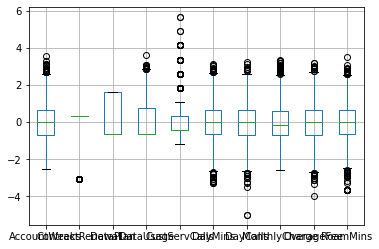

In [134]:
X.boxplot()

In [135]:
from scipy._lib.six import iteritems
for column in X.iteritems():
  Q1 = X[column[0]].quantile(0.25)
  Q3 = X[column[0]].quantile(0.75)
  mean = X[column[0]].mean()

  X[X[column[0]] > Q3 + 1.5*(Q3 - Q1)] = mean
  X[X[column[0]] < Q1 - 1.5*(Q3 - Q1)] = mean

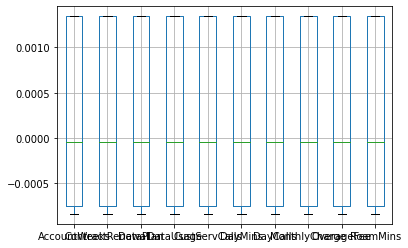

In [136]:
X.boxplot()

In [137]:
X.describe()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.000276,0.000276,0.000276,0.000276,0.000276,0.000276,0.000276,0.000276,0.000276,0.000276
std,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948,0.000948
min,-0.000838,-0.000838,-0.000838,-0.000838,-0.000838,-0.000838,-0.000838,-0.000838,-0.000838,-0.000838
25%,-0.000755,-0.000755,-0.000755,-0.000755,-0.000755,-0.000755,-0.000755,-0.000755,-0.000755,-0.000755
50%,-0.000041,-0.000041,-0.000041,-0.000041,-0.000041,-0.000041,-0.000041,-0.000041,-0.000041,-0.000041
75%,0.001344,0.001344,0.001344,0.001344,0.001344,0.001344,0.001344,0.001344,0.001344,0.001344
max,0.001344,0.001344,0.001344,0.001344,0.001344,0.001344,0.001344,0.001344,0.001344,0.001344


In [138]:
df = pd.concat([X, y], axis=1)

In [139]:
from sklearn.utils import resample

In [140]:
df.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [141]:
# Separate majority and minority classes
df_maj = df[df.Churn==0]
df_min = df[df.Churn==1]

print("The minority sample size is: {}".format(len(df_min))) #483

# Downsample majority class
df_maj_new = resample(df_maj, replace=True,    # sample without replacement
                             n_samples=2000,     # to match minority class
                             random_state=1) # reproducible results

df_min_new = resample(df_min, replace=True,    # sample without replacement
                             n_samples=800,     # to match minority class
                             random_state=1) # reproducible results

# Combine minority class with downsampled majority class
df = pd.concat([df_maj_new, df_min_new])
 
# Display new class counts
df.Churn.value_counts()

The minority sample size is: 483


0    2000
1     800
Name: Churn, dtype: int64

In [143]:
y = df['Churn']
X = df.drop(['Churn'], axis=1)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2019, stratify = y)

In [144]:
xg_ds_crossval = cross_val_score(xg_ds, X_val, y_val)
print("XG Boosting cross-validation score after ds: {:.2f}".format(xg_ds_crossval.mean()))

XG Boosting cross-validation score after ds: 1.00


In [117]:
pred_xg_ds = xg_ds.predict(X_val)
confusion_xg_ds=confusion_matrix(y_val, pred_xg_ds)
print("\nconfusion matrix for xg boosting after downsampling:\n{}".format(confusion_xg_ds))


confusion matrix for xg boosting after downsampling:
[[ 93   0]
 [  0 101]]
